In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib  as mpl
import matplotlib.pyplot as plt
import os, shutil, glob
from PIL import Image
from itertools import cycle
import re, math
import seaborn as sns; sns.set(color_codes=False)
os.getcwd()


'/home/jovyan/maris/2022/colo44'

In [2]:
Colors = [ 'darkorange', 'cornflowerblue',
                'forestgreen', 'red', 'yellow']
Alpha = 0.5 #transparency
LineWidth = 0.5

yRange = [-5.5, 6] # range for ploting scaled data (in SD)

FigureSize = (10, 5)
Resolution = 300
FontSize = 12
Flags = []

### Select one or several input files or folders

#### A) Folders

In [3]:
BaseDir = '/home/jovyan/cpp_work/results/'
# sorted(os.listdir(BaseDir))

In [4]:
InputFolders = []
NameContains = input("Enter part of name(s) of the folders: ") # colo44.*
for f in (f for f in os.listdir(BaseDir) if re.match(NameContains, f)):
    InputFolders.append(f)
print ('InputFolders: ' + str(InputFolders))

Enter part of name(s) of the folders:  colo44.*


InputFolders: ['colo44-v1-FA-P017367-CACO2-48h-P2-L1', 'colo44-v1-FA-P017365-CACO2-48h-P1-L1', 'colo44-v1-FA-P017366-CACO2-48h-P1-L2', 'colo44-v1-FA-P017368-CACO2-48h-P2-L2']


In [5]:
data =  pd.DataFrame()
ReadingFile = 0
for InpF in InputFolders:
    DataFromFolder =  pd.DataFrame()
    QC_files = glob.glob(BaseDir + '/*' + InpF + '/*/*/qcRAW_images' + '*.csv', recursive=True)
    print(QC_files)
    for file in QC_files[:]:
        print(file)
        DataFromOneFile =  pd.read_csv(file, sep=",", low_memory=False)
        print(DataFromOneFile.shape)
        ReadingFile += 1    
        DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True, sort=False)
        data = data.append(DataFromFolder.iloc[:,:], ignore_index=True)
print('Found %s files' %(ReadingFile))
print ('Dataframe contains %s columns and %s rows.' %(data.shape[1], data.shape[0]))

['/home/jovyan/cpp_work/results/colo44-v1-FA-P017367-CACO2-48h-P2-L1/1611/1171/qcRAW_images_colo44-v1-FA-P017367-CACO2-48h-P2-L1.csv']
/home/jovyan/cpp_work/results/colo44-v1-FA-P017367-CACO2-48h-P2-L1/1611/1171/qcRAW_images_colo44-v1-FA-P017367-CACO2-48h-P2-L1.csv
(2772, 587)
['/home/jovyan/cpp_work/results/colo44-v1-FA-P017365-CACO2-48h-P1-L1/1610/1170/qcRAW_images_colo44-v1-FA-P017365-CACO2-48h-P1-L1.csv']
/home/jovyan/cpp_work/results/colo44-v1-FA-P017365-CACO2-48h-P1-L1/1610/1170/qcRAW_images_colo44-v1-FA-P017365-CACO2-48h-P1-L1.csv
(2772, 587)
['/home/jovyan/cpp_work/results/colo44-v1-FA-P017366-CACO2-48h-P1-L2/1612/1173/qcRAW_images_colo44-v1-FA-P017366-CACO2-48h-P1-L2.csv']
/home/jovyan/cpp_work/results/colo44-v1-FA-P017366-CACO2-48h-P1-L2/1612/1173/qcRAW_images_colo44-v1-FA-P017366-CACO2-48h-P1-L2.csv
(2772, 587)
['/home/jovyan/cpp_work/results/colo44-v1-FA-P017368-CACO2-48h-P2-L2/1613/1175/qcRAW_images_colo44-v1-FA-P017368-CACO2-48h-P2-L2.csv']
/home/jovyan/cpp_work/results/c

In [ ]:
# take only the latest files if QC is run several times
data =  pd.DataFrame()
ReadingFile = 0
for InpF in InputFolders:
    DataFromFolder =  pd.DataFrame()
    QC_files = glob.glob(BaseDir + '/*' + InpF + '/*/*/qcRAW_images' + '*.csv', recursive=True)
    for file in QC_files[-1:]:
        print(file)
        DataFromOneFile =  pd.read_csv(file, sep=",", low_memory=False)
        ReadingFile += 1    
        DataFromFolder = DataFromFolder.append(DataFromOneFile.iloc[:,:], ignore_index=True, sort=False)
        data = data.append(DataFromFolder.iloc[:,:], ignore_index=True, sort=False)
print('Found %s files' %(ReadingFile))
print ('Dataframe contains %s columns and %s rows.' %(data.shape[1], data.shape[0]))

#### B) One input file

In [ ]:
BaseDir = '/home/jovyan/cpp_work/results/Co000038-PVE-v1-U2OS-L1-copy1/641/149'
# BaseDir = '../mnt/cpp-pvc/results/384-P000013-helgi-U2OS-24h-L1-copy1/59/14/384-P000013-helgi-U2OS-24h-L1-copy1/qc_of_raw_img'
os.listdir(BaseDir)

In [ ]:
NameContains = input("Enter name of the file of image quality data: ") #e.g. Anton_GPCR, 21plates_QC
data  = pd.read_csv(BaseDir + '/' + NameContains + '.csv', low_memory=False, sep=',')
print ('Dataframe contains %s columns and %s rows.' %(data.shape[1], data.shape[0]))

#### C) Join input from several files

In [ ]:
BaseDir = 'Z:/cellprofiler/jonne/cpoutput/covid19profiling/Exp1-huh7-229E_L1-20X/qc_of_raw_img'
sorted(os.listdir(BaseDir))

In [ ]:
InputFiles = []
NameContains = input("Enter part of name(s) of the file(s) of image quality data: ") # qcRAW_384-P000013
for f in (f for f in os.listdir(BaseDir) if ((NameContains in f) & ('Image.csv' in f))):
    InputFiles.append(f)
print ('InputFiles: ' + str(InputFiles))
data =  pd.DataFrame()
ReadingFile = 0
for file in sorted(InputFiles):
    DataFromOneFile =  pd.read_csv(BaseDir + '/' + file, sep=",", low_memory=False)
    ReadingFile += 1
    data = data.append(DataFromOneFile.iloc[:,:], ignore_index=True)
print ('Dataframe contains %s columns and %s rows.' %(data.shape[1], data.shape[0]))

### Check number of plates, wells, sites

In [7]:
try: 
    PlateNames = sorted(list(set(data['Metadata_Barcode'])))
    print('Number of plates: %s' %(len(PlateNames)))
    print(PlateNames)
    data.sort_values(['Metadata_Barcode','Metadata_Well', 'Metadata_Site'], inplace = True)
    data.reset_index(drop=True, inplace = True)
except:
    print('Plate names not specified')
    PlateNames = []
Wells = sorted(list(set(data['Metadata_Well'])))
NrOfWells = len(Wells)
print('Number of wells: %s' %(NrOfWells))
Rows = sorted(list(set([w[0] for w in Wells])))
print(*Rows)
NrOfRows = len(Rows)
Columns = sorted(list(set([w[1:] for w in Wells])))
NrOfColumns = len(Columns)
print(*Columns)
Sites = sorted(list(set(data['Metadata_Site'])))
NrOfSites = len(Sites)
print('Number of sites: %s' %(NrOfSites))
print('Processed {} of {} images'.format(data.shape[0],len(PlateNames)*NrOfWells*NrOfSites))
# data.tail()

Number of plates: 4
['colo44-v1-FA-P017365-CACO2-48h-P1-L1', 'colo44-v1-FA-P017366-CACO2-48h-P1-L2', 'colo44-v1-FA-P017367-CACO2-48h-P2-L1', 'colo44-v1-FA-P017368-CACO2-48h-P2-L2']
Number of wells: 308
B C D E F G H I J K L M N O
02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23
Number of sites: 9
Processed 11088 of 11088 images


### Specify where to place plots

In [8]:
DatasetName = input("Enter name for output folder: ") # 5_Std
PathToPlots = 'QC/' + DatasetName 
if not os.path.exists(PathToPlots): 
    os.makedirs(PathToPlots)

Enter name for output folder:  5_Std


### Select measures

In [9]:
ImageQuality = [s for s in data.columns if "ImageQuality_" in s]
ImageQualityModule = [s.replace('ImageQuality_', '') for s in ImageQuality]
ImageQualityMeasures = sorted(list(set([re.sub('_.*', '', s) for s in ImageQualityModule])))
CountMeasures = len(ImageQualityMeasures)
print('ImageQuality module has measured '
      + str(CountMeasures) + ' parameters: ' + ', '.join(ImageQualityMeasures))

ImageQuality module has measured 22 parameters: Correlation, FocusScore, LocalFocusScore, MADIntensity, MaxIntensity, MeanIntensity, MedianIntensity, MinIntensity, PercentMaximal, PercentMinimal, PowerLogLogSlope, Scaling, StdIntensity, ThresholdBackground, ThresholdKapur, ThresholdMCT, ThresholdMoG, ThresholdOtsu, ThresholdRidlerCalvard, ThresholdRobustBackground, TotalArea, TotalIntensity


In [10]:
NotSoUseful = ['TotalArea', 'Scaling', 'TotalIntensity', 'Correlation', 'PercentMinimal'
               ,'LocalFocusScore', 'MinIntensity', 'MedianIntensity', 'MADIntensity'
               ,'ThresholdMoG'
               ,'ThresholdBackground'
               ,'ThresholdKapur'
               ,'ThresholdMCT'
               ,'ThresholdOtsu'
               ,'ThresholdRidlerCalvard'
               ,'ThresholdRobustBackground'
               ]
for u in NotSoUseful:
    ImageQualityMeasures.remove(u)
CountMeasures = len(ImageQualityMeasures)
print('I will use ' + str(CountMeasures) + ' parameters: ' + 
      ', '.join(ImageQualityMeasures))

DataFrameDictionary = {}
for z in ImageQualityMeasures:
    parameter = [s for s in ImageQuality if ('_' + z) in s]
    DataFrameDictionary[z]=data[parameter]
DataFrameList = sorted(list(DataFrameDictionary.keys()))

I will use 6 parameters: FocusScore, MaxIntensity, MeanIntensity, PercentMaximal, PowerLogLogSlope, StdIntensity


### Create lineplots

In [11]:
nrSubplots=len(DataFrameList)
# old: ChannelNames = [ 'Hoechst', 'Mito', 'Phalloid.', 'Syto', 'Concan.']
# new:
ChannelNames = []
for c in list(DataFrameDictionary[DataFrameList[0]].columns):
    ChannelNames.append(re.sub('.*_', '', c))
ChannelNames

['CONC', 'HOECHST', 'MITO', 'PHAandWGA', 'SYTO']

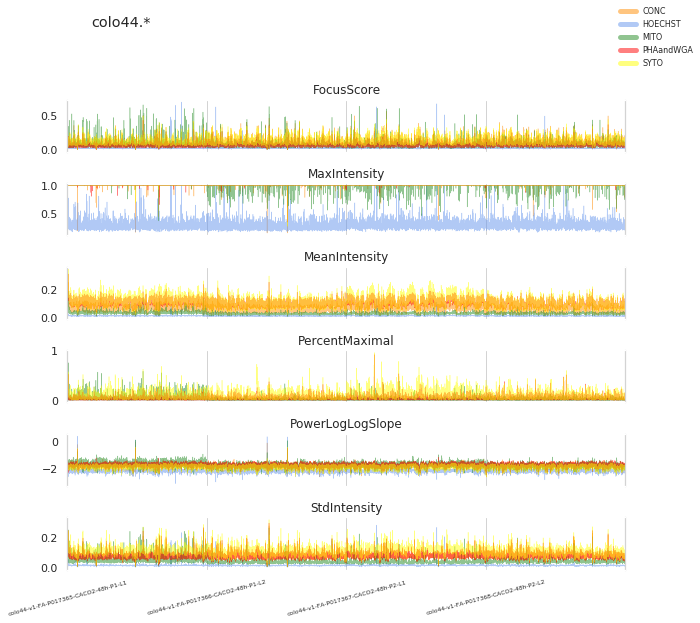

In [12]:
fig = plt.figure(figsize = (FigureSize[0],1.5*nrSubplots))
fig.suptitle(NameContains,fontsize = FontSize*1.2, x = 0.2)

for x in range(0, nrSubplots):
    CurrentDataFrame = DataFrameDictionary.get(DataFrameList[x])
    CurrentDFName = ImageQualityMeasures[x]
    #print(CurrentDataFrame.columns)

    ax = fig.add_subplot(nrSubplots, 1, x+1)
    ax.set_title(CurrentDFName, fontsize = 12)
    ax.set_facecolor('w')
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.set_xlim([0, len(CurrentDataFrame.index)])
    #ax.set_ylim([0, 1])
    myplot = CurrentDataFrame.plot(kind='line', linewidth=0.5, alpha=Alpha, ax=ax, legend=None, color = Colors)
    xticks = np.arange(0, len(CurrentDataFrame.index), NrOfSites*NrOfColumns*NrOfRows)
    ax.set_xticks(xticks)
    # ax.set_yticks()
    ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='', linewidth=0)
    ax.tick_params(axis='x', labelbottom=False)
    if x == nrSubplots - 1:
        ax.tick_params(axis='x', labelbottom=True)
        ax.set_xticklabels(PlateNames)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(FontSize -6) 
            tick.label.set_rotation(15)
plt.subplots_adjust(top=0.85, hspace=0.60)
leg = fig.legend(ChannelNames, fontsize = 8, frameon=False)
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.savefig(PathToPlots + '/All.png', dpi=Resolution)
plt.show()

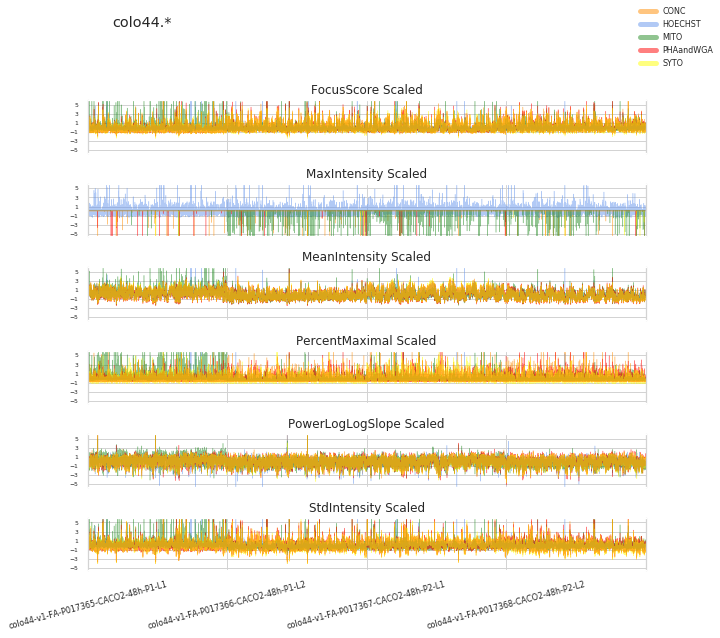

In [13]:
fig = plt.figure(figsize = (FigureSize[0],1.5*nrSubplots))
fig.suptitle(NameContains,fontsize = FontSize*1.2, x = 0.2)
for x in range(0, nrSubplots):
    CurrentDataFrame = DataFrameDictionary.get(DataFrameList[x])
    CurrentDFName = ImageQualityMeasures[x]
    x_unscaled = CurrentDataFrame.values #returns a numpy array
    x_scaled = StandardScaler().fit_transform(x_unscaled)
    CurrentDataFrameScaled = pd.DataFrame(x_scaled, columns = ChannelNames)

    ax = fig.add_subplot(nrSubplots, 1, x+1)
    ax.set_title(CurrentDFName + ' Scaled', fontsize = FontSize)
    ax.set_facecolor('w')
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.set_xlim([0, len(CurrentDataFrameScaled.index)])
    ax.set_ylim(yRange[0], yRange[1])
    myplot = CurrentDataFrameScaled.plot(kind='line', linewidth=0.5, alpha=0.5, ax=ax, legend=None, color = Colors)
    xticks = np.arange(0, len(CurrentDataFrameScaled.index), NrOfSites*NrOfColumns*NrOfRows)
    ax.set_xticks(xticks)
    ax.set_yticks(np.arange(start = math.ceil(yRange[0]), stop = yRange[1], step = 2))
    ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    ax.tick_params(axis='x', labelbottom=False)
    if x == nrSubplots - 1:
        ax.tick_params(axis='x', labelbottom=True)
        ax.set_xticklabels(PlateNames)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(FontSize -4) 
            tick.label.set_rotation(15)
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(6)
plt.subplots_adjust(top=0.85, hspace=0.60)
leg = fig.legend(ChannelNames, fontsize = 8, frameon=False)
for line in leg.get_lines():
    line.set_linewidth(5.0)
plt.savefig(PathToPlots + '/All_Scaled.png', dpi=Resolution)
plt.show()

### Create flags (for one measure at a time)

#### Here I'll flag with cut-offs: PercentMaximal > 0.3, FocusScore > 0.3 and < 0.001, PowerLogLogSlope > -0.5 and < 2.3

In [15]:
for i, item in enumerate(DataFrameList):
        print(i, item)

p = input('Enter an integer from 0 to %s:' %(len(DataFrameList)-1))
try:
    p = int(p)
except:
    p=0
CurrentDataFrame = DataFrameDictionary.get(DataFrameList[p])
CurrentDFName = ImageQualityMeasures[p]
CurrentDataFrame.describe(percentiles =  [.25, .5, .75, .90, .99]).iloc[1:]

0 FocusScore
1 MaxIntensity
2 MeanIntensity
3 PercentMaximal
4 PowerLogLogSlope
5 StdIntensity


Enter an integer from 0 to 5: 3


,ImageQuality_PercentMaximal_CONC,ImageQuality_PercentMaximal_HOECHST,ImageQuality_PercentMaximal_MITO,ImageQuality_PercentMaximal_PHAandWGA,ImageQuality_PercentMaximal_SYTO
mean,0.014438,0.000147,0.020229,0.040383,0.100047
std,0.018996,0.004526,0.040612,0.046216,0.082791
min,0.000021,0.000021,0.000021,0.000021,0.000021
25%,0.002508,0.000021,0.000965,0.009495,0.041854
50%,0.007566,0.000021,0.006109,0.027713,0.081201
75%,0.019547,0.000021,0.022339,0.055004,0.136955
90%,0.036143,0.000021,0.051089,0.090739,0.202885
99%,0.088146,0.000021,0.216995,0.207537,0.396636
max,0.315522,0.330890,0.749614,0.913880,0.953361


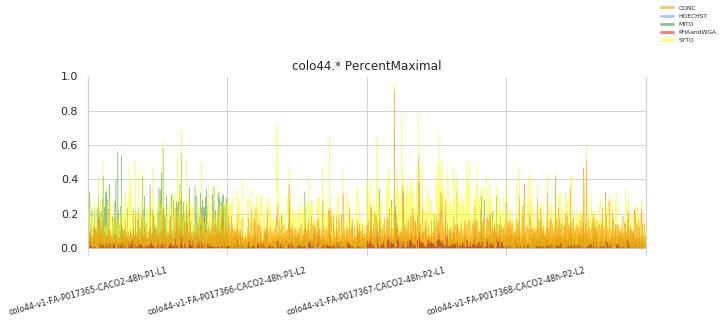

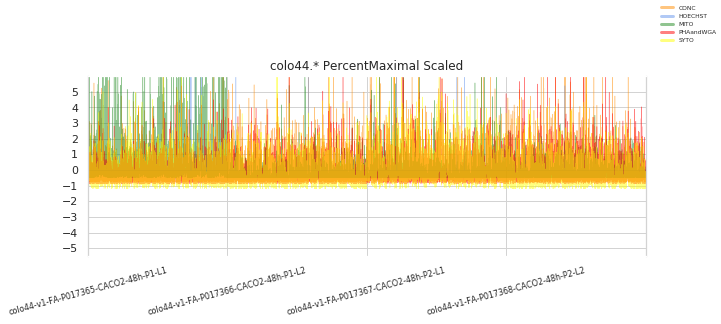

In [16]:
# PLOT RAW DATA

fig = plt.figure(figsize = FigureSize)
#fig.suptitle(' ',fontsize = FontSize, x=0.1)
ax = fig.add_subplot(111)
ax.set_title(NameContains + ' ' + CurrentDFName, fontsize = FontSize)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.set_xlim([0, len(CurrentDataFrame.index)])
ax.set_facecolor('w')
#ax.set_ylim([0, 0.2])
myplot = CurrentDataFrame.plot(kind='line', linewidth=LineWidth, alpha=Alpha, ax=ax, legend=None, color = Colors)
#ax.set_yticks([-2.3,  -0.5])
xticks = np.arange(0, len(CurrentDataFrame.index), NrOfSites*NrOfColumns*NrOfRows)
ax.set_xticks(xticks)
ax.set_xticklabels(PlateNames)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FontSize -4) 
    tick.label.set_rotation(15)
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='-', linewidth=1)
ax.tick_params(axis='x', labelbottom=True, color='lightgrey')
plt.subplots_adjust(top=0.8, bottom = 0.3, hspace=0.40)
leg = fig.legend(ChannelNames, fontsize = 6,frameon=False)
for line in leg.get_lines():
    line.set_linewidth(3.0)
plt.savefig(PathToPlots + '/' + CurrentDFName + '.png', dpi = Resolution)
plt.savefig(PathToPlots + '/' + CurrentDFName + '.pdf', dpi = Resolution)
plt.show()

# PLOT SCALED DATA
x_unscaled = CurrentDataFrame.values 
x_scaled = StandardScaler().fit_transform(x_unscaled)
CurrentDataFrameScaled = pd.DataFrame(x_scaled, columns = ChannelNames)

fig = plt.figure(figsize = FigureSize)
ax = fig.add_subplot(111)
ax.set_title(NameContains + ' ' + CurrentDFName + ' Scaled', fontsize = FontSize)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.set_xlim([0, len(CurrentDataFrame.index)])

ax.set_facecolor('w')

myplot = CurrentDataFrameScaled.plot(kind='line', linewidth=LineWidth, alpha=Alpha, ax=ax, legend=None, color = Colors)
xticks = np.arange(0, len(CurrentDataFrame.index), NrOfSites*NrOfColumns*NrOfRows)
ax.set_xticks(xticks)
ax.set_xticklabels(PlateNames)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FontSize -4) 
    tick.label.set_rotation(15)
ax.set_ylim(yRange)
ax.set_yticks(np.arange(start = math.ceil(yRange[0]), stop = yRange[1]))
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.tick_params(axis='x', labelbottom=True, color='lightgreys')
plt.subplots_adjust(top=0.8, hspace=0.40, bottom = 0.3)
leg = fig.legend(ChannelNames, fontsize = 6,frameon=False)
for line in leg.get_lines():
    line.set_linewidth(3.0)
plt.savefig(PathToPlots + '/' +CurrentDFName + 'Scaled.png', dpi=Resolution)
plt.savefig(PathToPlots + '/' +CurrentDFName + 'Scaled.pdf', dpi=Resolution)
plt.show() 

In [ ]:
LowerLimitScaled = float('-inf') # e.g. -3 for MeanIntensityScaled
UpperLimitScaled = float('inf')
NewFlagSc = 'OutlierScaled' + '_' + DataFrameList[p] + '_' + str(LowerLimitScaled) + '_' + str (UpperLimitScaled)
print('Outliers will be flagged in column: ' + NewFlagSc)
Flags.append(NewFlagSc)
data[NewFlagSc] = 0

In [ ]:
CurrentDataFrameOutliersMetadata = data[(CurrentDataFrameScaled.values >= UpperLimitScaled).
                                any(1) | (CurrentDataFrameScaled.values <= LowerLimitScaled).
                                any(1)][['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site']]
CurrentDataFrameOutliersValues = CurrentDataFrameScaled[(CurrentDataFrameScaled.values >= UpperLimitScaled).
                                any(1) | (CurrentDataFrameScaled.values <= LowerLimitScaled).
                                any(1)]
CurrentDataFrameScaledOutliers = CurrentDataFrameOutliersMetadata.merge(CurrentDataFrameOutliersValues,
                                                                  left_index=True, right_index=True)
print(CurrentDataFrameScaledOutliers.shape[0])
CurrentDataFrameScaledOutliers

In [ ]:
Outliers = CurrentDataFrameScaledOutliers.index.values.tolist()
data.loc[Outliers,NewFlagSc] = 1
print('%s images flagged in column %s' %(CurrentDataFrameScaledOutliers.shape[0], NewFlagSc))

In [17]:
LowerLimit = float('-inf') #float('-inf') # Here you can specify some limit; e.g. -2.3 for PowerLogLogSlope
UpperLimit = 0.3 #float('inf') e.g. -0.5 for PowerLogLogSlope, or 0.4 for FocusScore, or 0.3 for PercentMaximal
NewFlagRaw = 'Outlier' + '_' + DataFrameList[p] + '_' + str(LowerLimit) + '_' + str (UpperLimit)
Flags.append(NewFlagRaw)
print('Outliers will be flagged in column: ' + NewFlagRaw)
data[NewFlagRaw] = 0

Outliers will be flagged in column: Outlier_PercentMaximal_-inf_0.3


In [18]:
CurrentDataFrameOutliersMetadata = data[(CurrentDataFrame.values > UpperLimit).
                                any(1) | (CurrentDataFrame.values < LowerLimit).
                                        any(1)][['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site']]
CurrentDataFrameOutliersValues = CurrentDataFrame[(CurrentDataFrame.values > UpperLimit).
                                any(1) | (CurrentDataFrame.values < LowerLimit).
                                any(1)]
CurrentDataFrameOutliers = CurrentDataFrameOutliersMetadata.merge(CurrentDataFrameOutliersValues,
                                                                  left_index=True, right_index=True)
print('%s images flagged in column %s' %(CurrentDataFrameOutliers.shape[0], NewFlagRaw))
CurrentDataFrameOutliers.head(50)

359 images flagged in column Outlier_PercentMaximal_-inf_0.3


,Metadata_Barcode,Metadata_Well,Metadata_Site,ImageQuality_PercentMaximal_CONC,ImageQuality_PercentMaximal_HOECHST,ImageQuality_PercentMaximal_MITO,ImageQuality_PercentMaximal_PHAandWGA,ImageQuality_PercentMaximal_SYTO
3,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,4,0.021283,0.000021,0.112290,0.176569,0.383466
5,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,6,0.061150,0.000021,0.076282,0.182056,0.453104
8,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,9,0.002122,0.000021,0.002122,0.099151,0.338113
9,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B03,1,0.009881,0.000021,0.022870,0.354895,0.320066
10,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B03,2,0.053048,0.000021,0.083312,0.349516,0.331662
11,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B03,3,0.098830,0.000021,0.195388,0.457862,0.489369
12,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B03,4,0.004608,0.000021,0.024005,0.362976,0.310185
13,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B03,5,0.106524,0.000021,0.236025,0.373778,0.444316
14,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B03,6,0.081919,0.000021,0.197938,0.389768,0.418274
16,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B03,8,0.001993,0.000021,0.366362,0.067816,0.080676


In [19]:
Outliers = CurrentDataFrameOutliers.index.values.tolist()
data.loc[Outliers,NewFlagRaw] = 1
print('%s images flagged in column %s' %(CurrentDataFrameOutliers.shape[0], NewFlagRaw))

359 images flagged in column Outlier_PercentMaximal_-inf_0.3


## Heatmap for Count_nuclei (and/or anything else)

In [20]:
len(PlateNames)

4

In [21]:
Co, Ro = 2, math.ceil(len(PlateNames)/2) # 
HeatmapSize = 10, 8
wspace = 0.1
hspace = 0.4
top = 0.9

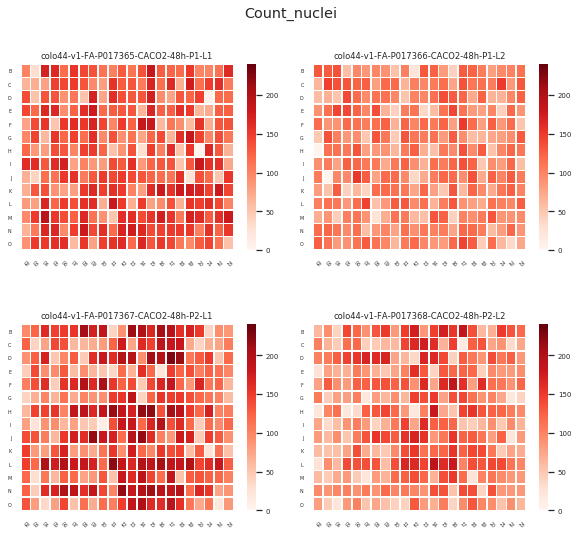

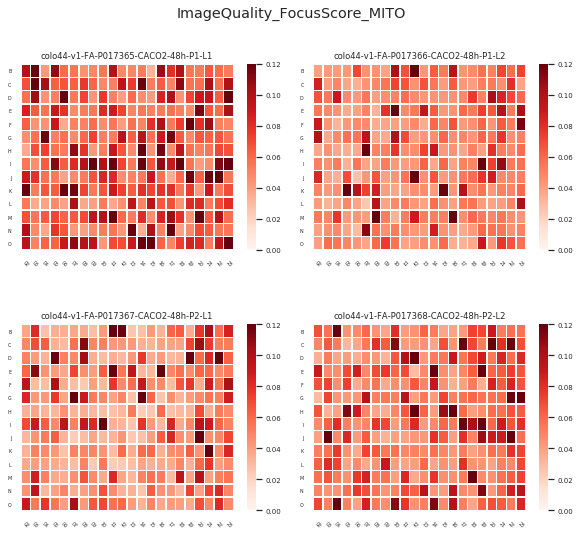

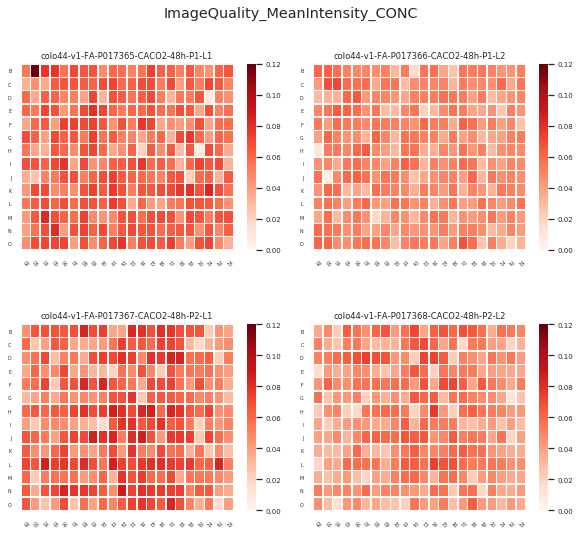

In [22]:
SelectedMeasures = ['Count_nuclei', 'ImageQuality_FocusScore_MITO', 'ImageQuality_MeanIntensity_CONC']
for HeatmapFor in SelectedMeasures:
    
    fig = plt.figure(figsize = (HeatmapSize))
    
    vmedall = math.ceil(data[HeatmapFor].quantile(0.5)*100)/100
    #vmin = math.floor(CurrentDataFrame[HeatmapFor].quantile(0.05)*100)/100


    fig.suptitle('{}'.format(HeatmapFor)  , fontsize = FontSize*1.2, y=1)
    n = 1
    for plate in PlateNames:
        dfoneplate = data.loc[data['Metadata_Barcode'] == plate][[HeatmapFor, 'Metadata_Well']]
        for x in Wells:
            if x not in dfoneplate['Metadata_Well']:
                # print (n)
                newline = pd.DataFrame([[0, x]], index = [0], columns = [HeatmapFor, 'Metadata_Well'])
                #print (newline)
                #print(dfoneplate)
                dfoneplate = dfoneplate.append(newline)
                #print(dfoneplate)
        #vmed = math.ceil(dfoneplate[HeatmapFor].quantile(0.5)*1000)/1000
        dictOfnumeric = { HeatmapFor : np.mean}
        groupedby = dfoneplate.groupby('Metadata_Well').agg(dictOfnumeric)
        vmed = math.ceil(groupedby[HeatmapFor].quantile(0.5)*1000)/1000
        v10 = math.ceil(groupedby[HeatmapFor].quantile(0.1)*1000)/1000
        v25 = math.ceil(groupedby[HeatmapFor].quantile(0.25)*1000)/1000
        v75 = math.ceil(groupedby[HeatmapFor].quantile(0.75)*1000)/1000
        # print(len(groupedby.index))
        if len(groupedby.index) > 0:
            #groupedbydf = pd.DataFrame(groupedby[HeatmapFor].values.reshape((NrOfRows,NrOfColumns)))
            groupedbyvalues = groupedby[HeatmapFor].values
            groupedbyvalues.resize(NrOfRows,NrOfColumns)
            groupedbydf = pd.DataFrame(groupedbyvalues)
            groupedbydf.columns = Columns
            groupedbydf.index = Rows
            # print('Maximum: ' + str(groupedbydf.to_numpy().max()))
            ax = fig.add_subplot(Ro, Co , n)
            ax = sns.heatmap(groupedbydf, vmin = 0,  
                             #cmap='RdBu_r',
                             cmap='Reds',
                             vmax = vmedall*2,
                             #vmax=200,
                             square = False,
                             linewidths = .5,
                             xticklabels = 1, yticklabels = groupedbydf.index,
                             #cbar_kws = {'ticks': [0, 50, 100, 150, 200, 250]}
                             )
            cbar = ax.collections[0].colorbar
            cbar.ax.tick_params(labelsize=7)
            plt.yticks(fontsize=FontSize/2.5,rotation=0)
            plt.xticks(fontsize=FontSize/2.5,rotation= -45) 

            ax.set_title(plate[:], fontsize = FontSize*0.7, loc= 'center')
            plt.subplots_adjust(  wspace = wspace, hspace = hspace, top = top)
            n += 1
            
    plt.savefig(PathToPlots +  '/'+ HeatmapFor + '_heatmap.png', dpi=Resolution, bbox_inches='tight')
    plt.savefig(PathToPlots +  '/'+ HeatmapFor + '_heatmap.pdf', dpi=Resolution, bbox_inches='tight')
    plt.show()

## PCA

In [23]:
ColumnsToUse = []
Channel = 'all channels'
for c in ['ImageQuality_' + s for s in ImageQualityMeasures]:
    ColumnsToUse.extend([col for col in data.columns if c in col])
# print(ColumnsToUse)
data[ColumnsToUse].describe(percentiles =  [.25, .5, .75, .90, .99, .999]).iloc[1:]

,ImageQuality_FocusScore_CONC,ImageQuality_FocusScore_HOECHST,ImageQuality_FocusScore_MITO,ImageQuality_FocusScore_PHAandWGA,ImageQuality_FocusScore_SYTO,ImageQuality_MaxIntensity_CONC,ImageQuality_MaxIntensity_HOECHST,ImageQuality_MaxIntensity_MITO,ImageQuality_MaxIntensity_PHAandWGA,ImageQuality_MaxIntensity_SYTO,...,ImageQuality_PowerLogLogSlope_CONC,ImageQuality_PowerLogLogSlope_HOECHST,ImageQuality_PowerLogLogSlope_MITO,ImageQuality_PowerLogLogSlope_PHAandWGA,ImageQuality_PowerLogLogSlope_SYTO,ImageQuality_StdIntensity_CONC,ImageQuality_StdIntensity_HOECHST,ImageQuality_StdIntensity_MITO,ImageQuality_StdIntensity_PHAandWGA,ImageQuality_StdIntensity_SYTO
mean,0.106304,0.021005,0.068735,0.065961,0.121788,0.997912,0.282550,0.991627,0.999715,0.999853,...,-1.826066,-2.189865,-1.727359,-1.740652,-1.898784,0.074308,0.013179,0.040974,0.078525,0.111264
std,0.051955,0.019932,0.052203,0.033993,0.050169,0.027446,0.083579,0.042062,0.008324,0.007821,...,0.198949,0.114081,0.199646,0.143784,0.157613,0.017582,0.006965,0.017405,0.019012,0.025977
min,0.000538,0.000476,0.000976,0.000763,0.000660,0.143404,0.154894,0.364172,0.341009,0.265263,...,-2.630638,-3.124340,-2.542896,-2.481000,-2.636156,0.002095,0.001271,0.002620,0.005252,0.004295
25%,0.069741,0.017568,0.040518,0.043535,0.086849,1.000000,0.231575,1.000000,1.000000,1.000000,...,-1.957289,-2.242314,-1.858305,-1.828723,-1.995219,0.063915,0.011257,0.032093,0.066981,0.095184
50%,0.093232,0.019975,0.055580,0.057259,0.109874,1.000000,0.265705,1.000000,1.000000,1.000000,...,-1.806122,-2.179457,-1.731661,-1.728775,-1.878197,0.072789,0.012914,0.037821,0.076268,0.110575
75%,0.128680,0.022476,0.079233,0.078646,0.143652,1.000000,0.311398,1.000000,1.000000,1.000000,...,-1.682015,-2.125197,-1.602547,-1.641171,-1.782334,0.082625,0.014543,0.045345,0.086956,0.125942
90%,0.173210,0.025227,0.114575,0.106335,0.188462,1.000000,0.369181,1.000000,1.000000,1.000000,...,-1.589725,-2.084203,-1.471539,-1.568754,-1.716605,0.093349,0.016125,0.054281,0.098981,0.141019
99%,0.286741,0.039313,0.287305,0.192517,0.290463,1.000000,0.586757,1.000000,1.000000,1.000000,...,-1.447879,-2.008238,-1.242716,-1.464180,-1.627110,0.133072,0.021258,0.120294,0.146206,0.187161
99.9%,0.380853,0.415843,0.540020,0.280318,0.363752,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.331922,-1.785859,-1.049056,-1.386545,-1.559354,0.191455,0.112143,0.210283,0.204648,0.253619
max,0.553980,0.685331,0.645376,0.424044,0.483207,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.008090,0.413466,0.129432,-0.462793,-0.404367,0.279056,0.283744,0.269204,0.297234,0.320155


In [24]:
# USE ONLY ONE CHANNEL
# ColumnsToUse = []
# Channel = Channels[1]
# for c in ['ImageQuality_' + s for s in ImageQualityMeasures]:
#    ColumnsToUse.extend([col for col in data.columns if (c in col and Channel in col)])

In [25]:
x = data.loc[:, ColumnsToUse].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2',
                                     'principal component 3', 'principal component 4'])
principalDf['plate'] = data['Metadata_Barcode']
loadingDf = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=ColumnsToUse)
#loadingDf.head()

In [26]:
Means = np.array(principalDf.describe().iloc[1].values)
print(Means)
Stdevs = np.array(principalDf.describe().iloc[2].values)
print(Stdevs)
UpperLimits = Means + Stdevs*3
print(UpperLimits)
LowerLimits = Means - Stdevs*3
print(LowerLimits)


[-4.10125677e-17  2.05062839e-17 -1.02531419e-17 -1.15347847e-17]
[3.04011321 2.5608092  1.7079116  1.49174579]
[9.12033964 7.68242759 5.1237348  4.47523737]
[-9.12033964 -7.68242759 -5.1237348  -4.47523737]


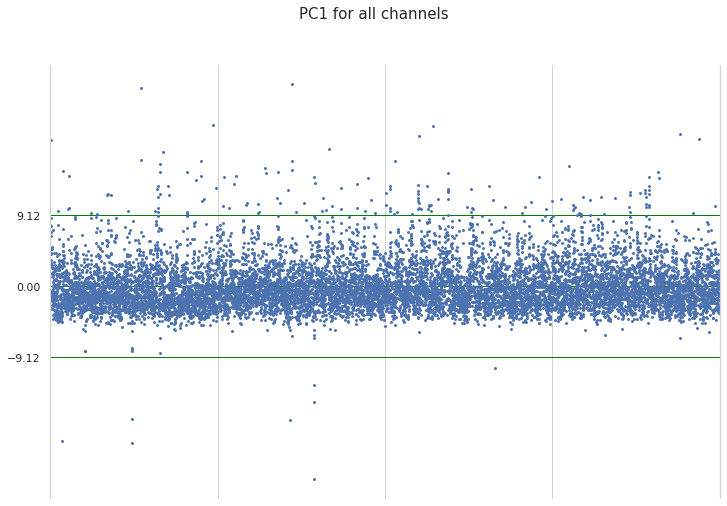

In [27]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('PC1 for ' + Channel , fontsize = 15)
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.set_xlim([0, len(principalDf)])
#ax.set_ylim([0, len(principalDf)])
xticks = np.arange(0, len(principalDf.index), NrOfSites*NrOfColumns*NrOfRows)
ax.set_xticks(xticks)
ax.set_yticks([LowerLimits[0], 0, UpperLimits[0]])
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='g', linestyle='-', linewidth=1)
ax.tick_params(axis='x', labelbottom=False)
ax.tick_params(axis='y', labelleft=True)
#ax.set_xlabel('PC 1', fontsize = 15)
#ax.set_ylabel('PC 2', fontsize = 15)
ax.scatter(principalDf.index, principalDf.loc[:, 'principal component 1'],
           marker = '.', s = 15);

plt.savefig(PathToPlots + '/' + Channel + '_PCA_1.png', dpi=Resolution)
plt.show()

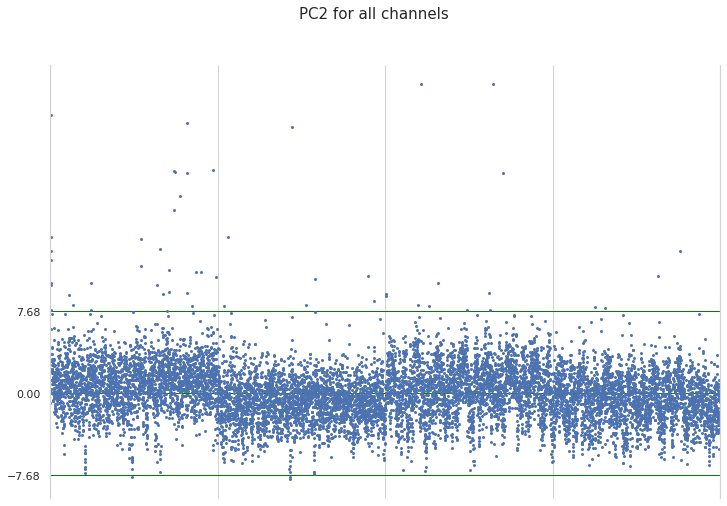

In [28]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('PC2 for ' + Channel , fontsize = 15)
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.set_xlim([0, len(principalDf)])
#ax.set_ylim([0, len(principalDf)])
xticks = np.arange(0, len(principalDf.index), NrOfSites*NrOfColumns*NrOfRows)
ax.set_xticks(xticks)
ax.set_yticks([LowerLimits[1], 0, UpperLimits[1]])
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='g', linestyle='-', linewidth=1)
ax.tick_params(axis='x', labelbottom=False)
ax.tick_params(axis='y', labelleft=True)
#ax.set_xlabel('PC 1', fontsize = 15)
#ax.set_ylabel('PC 2', fontsize = 15)
ax.scatter(principalDf.index, principalDf.loc[:, 'principal component 2'], marker = '.',
           s = 15);

plt.savefig(PathToPlots + '/' + Channel + '_PCA_2.png', dpi=Resolution)
plt.show()

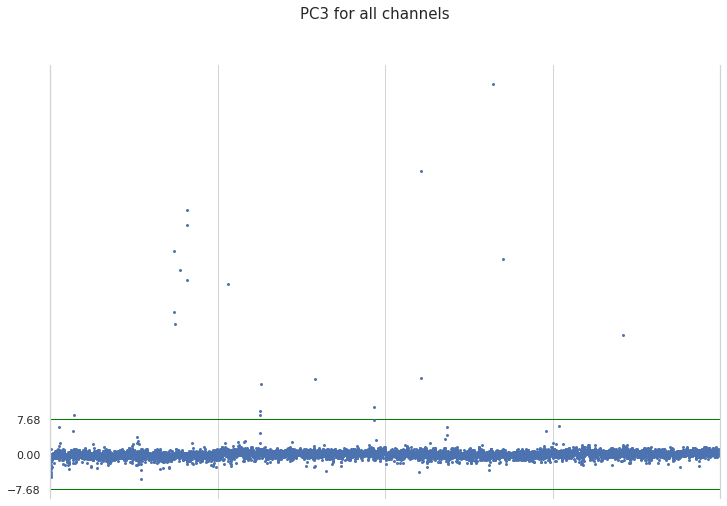

In [29]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('PC3 for ' + Channel , fontsize = 15)
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.set_xlim([0, len(principalDf)])
#ax.set_ylim([0, len(principalDf)])
xticks = np.arange(0, len(principalDf.index), NrOfSites*NrOfColumns*NrOfRows)
ax.set_xticks(xticks)
ax.set_yticks([LowerLimits[1], 0, UpperLimits[1]])
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='g', linestyle='-', linewidth=1)
ax.tick_params(axis='x', labelbottom=False)
ax.tick_params(axis='y', labelleft=True)
#ax.set_xlabel('PC 1', fontsize = 15)
#ax.set_ylabel('PC 2', fontsize = 15)
ax.scatter(principalDf.index, principalDf.loc[:, 'principal component 3'], marker = '.',
           s = 15);

plt.savefig(PathToPlots + '/' + Channel + '_PCA_3.png', dpi=Resolution)
plt.show()

In [30]:
PlateNames

['colo44-v1-FA-P017365-CACO2-48h-P1-L1',
 'colo44-v1-FA-P017366-CACO2-48h-P1-L2',
 'colo44-v1-FA-P017367-CACO2-48h-P2-L1',
 'colo44-v1-FA-P017368-CACO2-48h-P2-L2']

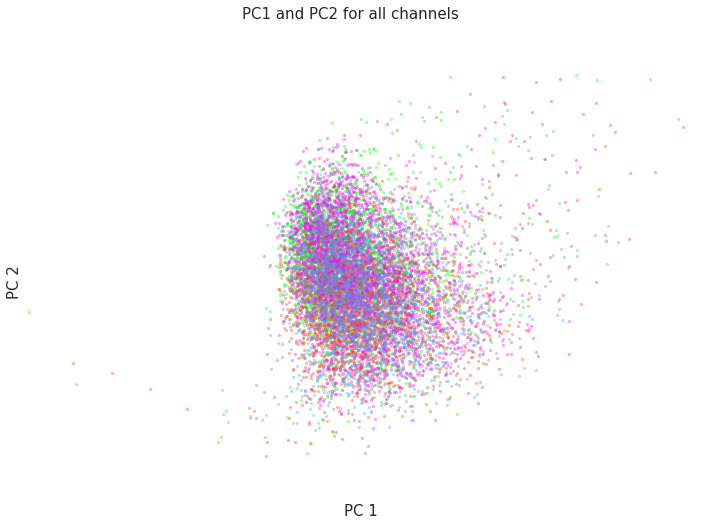

In [31]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('PC1 and PC2 for ' + Channel , fontsize = 15)
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.set_xlim([-20, 20])
ax.set_ylim([-10, 10])
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='', linewidth=1)
ax.tick_params(axis='x', labelbottom=False)
ax.tick_params(axis='y', labelleft=False)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
#ax.scatter(principalDf.loc[:, 'principal component 2'], principalDf.loc[:, 'principal component 3'],
#           marker = '.', s = 1);
targets = PlateNames

colors = ['lime', 'orangered', 'magenta', 'cornflowerblue']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['plate'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.3
               , s = 5)

plt.savefig(PathToPlots + '/' + Channel + '_PCA_1_2.png', dpi=Resolution)
plt.show()

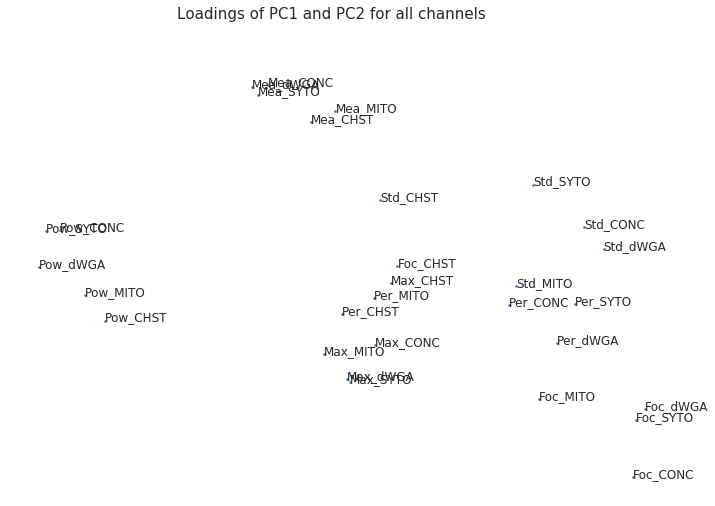

In [32]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('Loadings of PC1 and PC2 for ' + Channel , fontsize = 15)
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
#ax.set_xlim([0, len(principalDf)])
#ax.set_ylim([0, len(principalDf)])
#xticks = np.arange(0, len(principalDf.index), 540)
#ax.set_xticks(xticks)
#ax.set_yticks([LowerLimits[0], 0, UpperLimits[0]])
ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='', linewidth=1, alpha = 1)
ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='', linewidth=1)
ax.tick_params(axis='x', labelbottom=False)
ax.tick_params(axis='y', labelleft=False)
#ax.set_xlabel('PC 1', fontsize = 15)
#ax.set_ylabel('PC 2', fontsize = 15)
ax.scatter(loadingDf.loc[:, 'PC1'], loadingDf.loc[:, 'PC2'],
           marker = '.', s = 10);
for i, txt in enumerate(loadingDf.index):
    ax.annotate((txt[13:16] + '_' + txt[-4:]), (loadingDf.loc[txt, 'PC1'], loadingDf.loc[txt, 'PC2']))  

#plt.plot([0,100], [LowerLimits[0],LowerLimits[0]], color = 'r', linestyle='-')
#plt.plot([0,100], [UpperLimits[0],UpperLimits[0]], color = 'r', linestyle='-')
plt.savefig(PathToPlots + '/' + Channel + '_Loadings_PCA_1_2.png', dpi=Resolution)
plt.show()

In [33]:
principalDf.reset_index(inplace = True)
principalDf.head()
PCs = data[['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site']].merge(principalDf,
                                                                       left_index=True, right_index=True)
PCs.to_csv(PathToPlots + '/PCA_1_4.csv', sep = ';')
PCs.head()

,Metadata_Barcode,Metadata_Well,Metadata_Site,index,principal component 1,principal component 2,principal component 3,principal component 4,plate
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,1,0,6.398447,-0.878949,-0.787570,4.467437,colo44-v1-FA-P017365-CACO2-48h-P1-L1
1,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,2,1,1.624525,0.388548,-0.689576,-0.552281,colo44-v1-FA-P017365-CACO2-48h-P1-L1
2,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,3,2,1.227318,1.232168,-0.649304,-0.899282,colo44-v1-FA-P017365-CACO2-48h-P1-L1
3,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,4,3,7.843503,0.036531,-0.909033,0.497234,colo44-v1-FA-P017365-CACO2-48h-P1-L1
4,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,5,4,3.158289,0.067531,-0.486924,-1.123394,colo44-v1-FA-P017365-CACO2-48h-P1-L1


### All other lineplots

In [ ]:
for x in range(0, len(DataFrameList)):
    CurrentDataFrame = DataFrameDictionary.get(DataFrameList[x])
    CurrentDFName = ImageQualityMeasures[x]
    
    fig = plt.figure(figsize = FigureSize)
    #fig.suptitle(' ',fontsize = FontSize, x=0.1)
    ax = fig.add_subplot(111)
    ax.set_title(NameContains + ' ' + CurrentDFName, fontsize = FontSize)
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.set_xlim([0, len(CurrentDataFrame.index)])
    ax.set_facecolor('w')
    #ax.set_ylim([0, 1])
    myplot = CurrentDataFrame.plot(kind='line', linewidth=LineWidth, alpha=Alpha, ax=ax, legend=None, color = Colors)
    xticks = np.arange(0, len(CurrentDataFrame.index), NrOfSites*NrOfColumns)
    ax.set_xticks(xticks)
    ax.set_xticklabels(Rows)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FontSize -2) 
        tick.label.set_rotation(45)
    ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='', linewidth=0)
    ax.tick_params(axis='x', labelbottom=True, color='lightgrey')
    plt.subplots_adjust(top=0.7, hspace=0.40)
    leg = fig.legend(ChannelNames, fontsize = FontSize,frameon=False)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    plt.savefig(PathToPlots + CurrentDFName + '.png', dpi = Resolution)
    plt.show()

# PLOT SCALED DATA
    x_unscaled = CurrentDataFrame.values 
    x_scaled = StandardScaler().fit_transform(x_unscaled)
    CurrentDataFrameScaled = pd.DataFrame(x_scaled, columns = ChannelNames)

    fig = plt.figure(figsize = FigureSize)
    ax = fig.add_subplot(111)
    ax.set_title(NameContains + ' ' + CurrentDFName + ' Scaled', fontsize = FontSize)
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.set_xlim([0, len(CurrentDataFrame.index)])
    ax.set_facecolor('w')

    myplot = CurrentDataFrameScaled.plot(kind='line', linewidth=LineWidth, alpha=Alpha, ax=ax, legend=None, color = Colors)
    xticks = np.arange(0, len(CurrentDataFrame.index), NrOfSites*NrOfColumns)
    ax.set_xticks(xticks)
    ax.set_xticklabels(Rows)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FontSize -2) 
        tick.label.set_rotation(45)
    ax.set_ylim(yRange)
    ax.set_yticks(np.arange(start = math.ceil(yRange[0]), stop = yRange[1]))
    ax.grid(b=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    ax.grid(b=True, which='major', axis='y', color='lightgrey', linestyle='-', linewidth=1, alpha = 1)
    ax.tick_params(axis='x', labelbottom=True, color='lightgreys')
    plt.subplots_adjust(top=0.7, hspace=0.40)
    leg = fig.legend(ChannelNames, fontsize = 12,frameon=False)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    # plt.savefig(PathToPlots + '/' + CurrentDFName + 'Scaled.png', dpi=Resolution)
    plt.show() 

### Flags automatically

In [34]:
LowerLimitScaled = -5 #float('-inf') #
UpperLimitScaled = 5 #float('inf')

In [35]:
for p in range(0, len(DataFrameList)):
    CurrentDataFrame = DataFrameDictionary.get(DataFrameList[p])
    CurrentDFName = ImageQualityMeasures[p]
    
    x_unscaled = CurrentDataFrame.values 
    x_scaled = StandardScaler().fit_transform(x_unscaled)
    CurrentDataFrameScaled = pd.DataFrame(x_scaled, columns = ChannelNames)

    NewFlagSc = 'OutlierScaled' + '_' + DataFrameList[p] + '_' + str(LowerLimitScaled) + '_' + str (UpperLimitScaled)
    Flags.append(NewFlagSc)
    data[NewFlagSc] = 0

    CurrentDataFrameOutliersMetadata = data[(CurrentDataFrameScaled.values >= UpperLimitScaled).
                                    any(1) | (CurrentDataFrameScaled.values <= LowerLimitScaled).
                                    any(1)][['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site']]
    CurrentDataFrameOutliersValues = CurrentDataFrameScaled[(CurrentDataFrameScaled.values >= UpperLimitScaled).
                                    any(1) | (CurrentDataFrameScaled.values <= LowerLimitScaled).
                                    any(1)]
    CurrentDataFrameScaledOutliers = CurrentDataFrameOutliersMetadata.merge(CurrentDataFrameOutliersValues,
                                                                      left_index=True, right_index=True)

    Outliers = CurrentDataFrameScaledOutliers.index.values.tolist()
    data.loc[Outliers,NewFlagSc] = 1

In [36]:
data['Total'] = data[Flags].max(axis = 1)
Flags.append('Total')
print(data[Flags].sum())

# data.to_csv(PathToPlots + '/' + 'Flagged.csv', sep = ';')

Outlier_PercentMaximal_-inf_0.3        359
OutlierScaled_FocusScore_-5_5          132
OutlierScaled_MaxIntensity_-5_5        276
OutlierScaled_MeanIntensity_-5_5        52
OutlierScaled_PercentMaximal_-5_5      215
OutlierScaled_PowerLogLogSlope_-5_5     15
OutlierScaled_StdIntensity_-5_5        132
Total                                  750
dtype: int64


### Save file with flags and some other columns

In [37]:
some_columns = ['Metadata_Barcode', 'Metadata_Well', 'Metadata_Site', 'Count_nuclei',
                'ImageQuality_FocusScore_CONC', 'ImageQuality_FocusScore_HOECHST', 'ImageQuality_FocusScore_MITO', 'ImageQuality_FocusScore_PHAandWGA', 'ImageQuality_FocusScore_SYTO',
                'ImageQuality_MaxIntensity_CONC', 'ImageQuality_MaxIntensity_HOECHST', 'ImageQuality_MaxIntensity_MITO', 'ImageQuality_MaxIntensity_PHAandWGA', 'ImageQuality_MaxIntensity_SYTO',
                'ImageQuality_MeanIntensity_CONC', 'ImageQuality_MeanIntensity_HOECHST', 'ImageQuality_MeanIntensity_MITO', 'ImageQuality_MeanIntensity_PHAandWGA', 'ImageQuality_MeanIntensity_SYTO',
                'ImageQuality_PercentMaximal_CONC', 'ImageQuality_PercentMaximal_HOECHST', 'ImageQuality_PercentMaximal_MITO', 'ImageQuality_PercentMaximal_PHAandWGA',
                'ImageQuality_PowerLogLogSlope_CONC', 'ImageQuality_PowerLogLogSlope_HOECHST', 'ImageQuality_PowerLogLogSlope_MITO', 'ImageQuality_PowerLogLogSlope_PHAandWGA', 'ImageQuality_PowerLogLogSlope_SYTO',
                'ImageQuality_StdIntensity_CONC', 'ImageQuality_StdIntensity_HOECHST', 'ImageQuality_StdIntensity_MITO', 'ImageQuality_StdIntensity_PHAandWGA', 'ImageQuality_StdIntensity_SYTO']

data[some_columns + Flags].to_csv(PathToPlots + '/' + DatasetName + '_Flags.csv', sep = ';')

In [38]:
# Flags = []